In [1]:
%run ../methodes/ada_boost_definition.ipynb import Ada_Boost_
import pandas as pd

# On récupère le dataframe d'entraînement stocké en mémoire
%store -r df_train

C:\Users\LEGION\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\nbformat\__init__.py:92: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


In [2]:
# Valeurs à tester : nombre d'estimateurs et taux d'apprentissage
n_estimators_ = [5*i for i in range(1,10)]
learning_rates = np.logspace(-3, 0.001, 10)

In [3]:
# Initialisation des meilleurs paramètres
err_min = 100
ada_boost_best_n_estimators = -2
ada_boost_best_learning_rate = -2

In [4]:
# Initialisation des tableaux pour l'analyse des données
df_ab_train = pd.DataFrame(0, index = n_estimators_, columns = learning_rates)
df_ab_test = pd.DataFrame(0, index = n_estimators_, columns = learning_rates)

In [5]:
%%capture --no-display
%run utils.ipynb import K_Fold

for n_estimators in n_estimators_:
    for learning_rate in learning_rates:
        
        # Validation croisée avec K_Fold
        err_train, err_test = K_Fold(10, df_train, Ada_Boost_(n_estimators, learning_rate))

        # Calcul de l'erreur totale
        err = (err_train + err_test) / 2 

        # On garde les données en mémoire
        df_ab_train[learning_rate][n_estimators] = err_train
        df_ab_test[learning_rate][n_estimators] = err_test
                
        # On met à jour les meilleurs hyperparamètres
        if err < err_min:
            err_min = err
            ada_boost_best_n_estimators = n_estimators
            ada_boost_best_learning_rate = learning_rate

KeyboardInterrupt: 

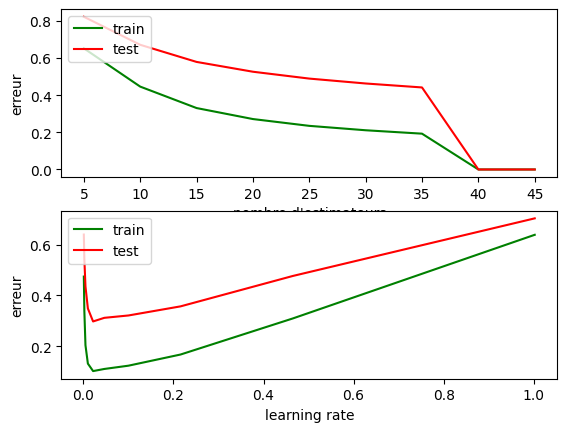

In [6]:
import matplotlib.pyplot as plt
# Représentation graphique

# Evolution de l'erreur moyenne en fonction du nombre d'estimateurs
plt.subplot(2,1,1) 
plot_df(df_ab_train, df_ab_test, 'nombre d\'estimateurs', 'index', True)

# Evolution de l'erreur moyenne en fonction du learning rate
plt.subplot(2,1,2) 
plot_df(df_ab_train, df_ab_test, 'learning rate', 'columns', True)

In [7]:
# Affichage des meilleurs hyperparamètres trouvés
print('err_min : ', err_min, ' | best number of estimators : ', ada_boost_best_n_estimators, 
      ' | best learning rate : ', ada_boost_best_learning_rate)

err_min :  0.12104377104377105  | best number of estimators :  35  | best learning rate :  0.02156640604885776


In [8]:
# On stocke en mémoire les meilleurs hyperparamètres trouvés
%store ada_boost_best_n_estimators
%store ada_boost_best_learning_rate

Stored 'ada_boost_best_n_estimators' (int)
Stored 'ada_boost_best_learning_rate' (float64)


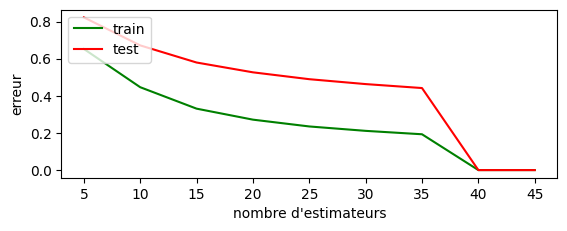

In [9]:
plt.subplot(2,1,1) 
plot_df(df_ab_train, df_ab_test, 'nombre d\'estimateurs', 'index', True)

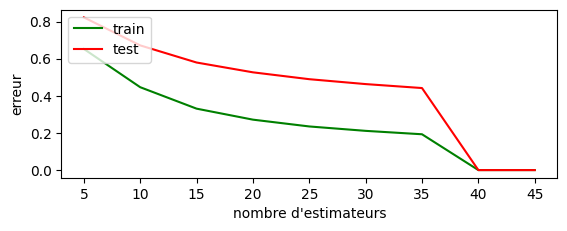

In [10]:
plt.subplot(2,1,1) 
plot_df(df_ab_train, df_ab_test, 'nombre d\'estimateurs', 'index', True)

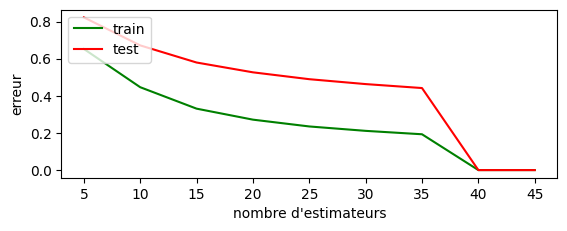

In [11]:
plt.subplot(2,1,1) 
plot_df(df_ab_train, df_ab_test, 'nombre d\'estimateurs', 'index', True)

In [12]:
print(df_ab_test)

    0.001000  0.002155  0.004644  0.010008  0.021566  0.046475  0.100154  \
5   0.959596  0.916162  0.858586  0.790909  0.774747  0.776768  0.767677   
10  0.907071  0.820202  0.726263  0.585859  0.508081  0.523232  0.534343   
15  0.858586  0.744444  0.628283  0.466667  0.379798  0.391919  0.391919   
20  0.813131  0.707071  0.514141  0.379798  0.290909  0.329293  0.347475   
25  0.774747  0.631313  0.442424  0.337374  0.256566  0.285859  0.308081   
30  0.741414  0.569697  0.393939  0.309091  0.240404  0.253535  0.276768   
35  0.707071  0.509091  0.358586  0.267677  0.227273  0.245455  0.263636   
40  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
45  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

    0.215830  0.465110  1.002305  
5   0.742424  0.722222  0.914141  
10  0.539394  0.660606  0.909091  
15  0.426263  0.598990  0.905051  
20  0.383838  0.587879  0.910101  
25  0.385859  0.568687  0.903030  
30  0.370707  0.577778  0.896